# Preparing the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip'

!wget "https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip" -O dataset.zip


--2025-03-24 00:29:29--  https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip
Resolving synthetichealth.github.io (synthetichealth.github.io)... 185.199.108.153, 185.199.111.153, 185.199.109.153, ...
Connecting to synthetichealth.github.io (synthetichealth.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7991968 (7.6M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   7.62M  --.-KB/s    in 0.1s    

2025-03-24 00:29:30 (51.9 MB/s) - ‘dataset.zip’ saved [7991968/7991968]



In [3]:
import zipfile
import os

zip_path = "dataset.zip"
extract_path = "extracted_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)


['organizations.csv',
 'payers.csv',
 'encounters.csv',
 'allergies.csv',
 'immunizations.csv',
 'observations.csv',
 'providers.csv',
 'medications.csv',
 'careplans.csv',
 'payer_transitions.csv',
 'devices.csv',
 'procedures.csv',
 'supplies.csv',
 'patients.csv',
 'claims_transactions.csv',
 'claims.csv',
 'imaging_studies.csv',
 'conditions.csv']

In [4]:
csv_files = [file for file in os.listdir(extract_path) if file.endswith(".csv")]

dataframes = {file: pd.read_csv(os.path.join(extract_path, file)) for file in csv_files}

for filename, df in dataframes.items():
    print(f" FILE {filename} - SHAPE: {df.shape}")
    display(df.head(3))  # Show first 3 rows


 FILE organizations.csv - SHAPE: (272, 11)


,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON,PHONE,REVENUE,UTILIZATION
0,74ab949d-17ac-3309-83a0-13b4405c66aa,Fitchburg Outpatient Clinic,881 Main Street,Fitchburg,MA,1420,42.586487,-71.805210,978-342-9781 Or 978-342-9781,0.0,66
1,faffaf6a-ee1a-3673-b0b0-421a9c249244,ACTIVATED BY WELLNESS LLC,66 WASHINGTON ST,STOUGHTON,MA,20722571,42.144158,-71.103783,6178719807,0.0,34
2,17a4bae5-8b64-34d7-8144-b428be027bd0,NURSE ON CALL,512 MAIN STREET SUITE 211,SHREWSBURY,MA,15456406,42.295110,-71.718085,5088451232,0.0,5


 FILE payers.csv - SHAPE: (10, 22)


,Id,NAME,OWNERSHIP,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,AMOUNT_COVERED,AMOUNT_UNCOVERED,...,UNCOVERED_ENCOUNTERS,COVERED_MEDICATIONS,UNCOVERED_MEDICATIONS,COVERED_PROCEDURES,UNCOVERED_PROCEDURES,COVERED_IMMUNIZATIONS,UNCOVERED_IMMUNIZATIONS,UNIQUE_CUSTOMERS,QOLS_AVG,MEMBER_MONTHS
0,a735bf55-83e9-331a-899d-a82a60b9f60c,Medicare,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,7816873.41,388769.54,...,0,3742,0,9155,0,546,0,30,0.692503,5532
1,df166300-5a78-3502-a46a-832842197811,Medicaid,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,8673985.13,192216.37,...,0,891,0,4990,0,886,0,44,0.939526,7092
2,d18ef2e6-ef40-324c-be54-34a5ee865625,Dual Eligible,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,581647.09,7344.74,...,0,67,0,527,0,72,0,5,0.513418,864


 FILE encounters.csv - SHAPE: (7049, 15)


,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,294d0dab-907e-8fce-7a47-0c0d322a5734,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.80,1567.00,87.2,NaN,NaN
1,2ccec874-cbaa-e280-7abb-f2bc2b603961,2013-04-07T09:04:48Z,2013-04-07T09:55:49Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.80,704.20,0.0,NaN,NaN
2,953c5138-ce17-4084-3432-1ac23f184528,2015-09-28T09:04:48Z,2015-09-28T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,db106514-f254-3402-b6a4-6d210c78c7e2,2c4b7d17-0ded-3e16-b5eb-6dda1d6a81bb,d31fccc3-1767-390d-966a-22a5156f4219,emergency,50849002,Emergency room admission (procedure),146.18,1008.98,0.0,125605004.0,Fracture of bone (disorder)


 FILE allergies.csv - SHAPE: (92, 15)


,START,STOP,PATIENT,ENCOUNTER,CODE,SYSTEM,DESCRIPTION,TYPE,CATEGORY,REACTION1,DESCRIPTION1,SEVERITY1,REACTION2,DESCRIPTION2,SEVERITY2
0,2014-07-26,NaN,4569671e-ed39-055f-8e78-422b96c9896b,f5242c34-8841-269a-50c5-c6f623575955,419199007,SNOMED-CT,Allergy to substance (finding),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-07-26,NaN,4569671e-ed39-055f-8e78-422b96c9896b,f5242c34-8841-269a-50c5-c6f623575955,84489001,SNOMED-CT,Mold (organism),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-07-26,NaN,4569671e-ed39-055f-8e78-422b96c9896b,f5242c34-8841-269a-50c5-c6f623575955,264287008,SNOMED-CT,Animal dander (substance),allergy,environment,878820003.0,Rhinoconjunctivitis (disorder),MODERATE,247472004.0,Wheal (finding),MILD


 FILE immunizations.csv - SHAPE: (1619, 6)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,140,Influenza seasonal injectable preservative ...,136.0
1,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,113,Td (adult) 5 Lf tetanus toxoid preservative ...,136.0
2,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,43,Hep B adult,136.0


 FILE observations.csv - SHAPE: (86360, 9)


,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,vital-signs,8302-2,Body Height,176.1,cm,numeric
1,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.0,{score},numeric
2,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,vital-signs,29463-7,Body Weight,86.4,kg,numeric


 FILE providers.csv - SHAPE: (272, 13)


,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,ENCOUNTERS,PROCEDURES
0,22d80c8d-fb8f-322d-9753-22002b043474,74ab949d-17ac-3309-83a0-13b4405c66aa,Ted955 Reilly981,M,GENERAL PRACTICE,881 Main Street,Fitchburg,MA,1420,42.586487,-71.805210,66,0
1,76781d9f-6cd0-30f2-81b3-359fad974235,faffaf6a-ee1a-3673-b0b0-421a9c249244,Gustavo235 Armstrong51,M,GENERAL PRACTICE,66 WASHINGTON ST,STOUGHTON,MA,20722571,42.144158,-71.103783,34,0
2,5fca6a38-55af-324f-835b-0eb5837afc1c,17a4bae5-8b64-34d7-8144-b428be027bd0,Isabela97 Solorio55,F,GENERAL PRACTICE,512 MAIN STREET SUITE 211,SHREWSBURY,MA,15456406,42.295110,-71.718085,5,0


 FILE medications.csv - SHAPE: (5605, 13)


,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2015-09-28T11:02:48Z,2015-10-15T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,d31fccc3-1767-390d-966a-22a5156f4219,953c5138-ce17-4084-3432-1ac23f184528,857005,Acetaminophen 325 MG / HYDROcodone Bitartrate ...,2.51,0.0,1,2.51,NaN,NaN
1,2015-09-28T11:02:48Z,2015-10-31T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,d31fccc3-1767-390d-966a-22a5156f4219,953c5138-ce17-4084-3432-1ac23f184528,310965,Ibuprofen 200 MG Oral Tablet,365.90,0.0,1,365.90,NaN,NaN
2,2005-11-08T20:24:07Z,NaN,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,e03e23c9-4df1-3eb6-a62d-f70f02301496,d1cea2e5-1735-089f-c72f-22ad16976663,310325,ferrous sulfate 325 MG Oral Tablet,0.15,0.0,50,7.50,NaN,NaN


 FILE careplans.csv - SHAPE: (329, 9)


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,47441dae-e581-6d99-e5fc-b7fbd9cde7fe,2015-09-28,2015-10-31,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,385691007,Fracture care (regime/therapy),359817006.0,Closed fracture of hip (disorder)
1,131c18a3-d324-663f-2f4a-d3ff0f6c26d6,1996-10-22,NaN,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,cc632c61-54a0-35f6-be9f-879875d14c4f,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
2,21ffb15e-179c-d330-70f0-0ebc59b1cdb9,2020-10-30,2020-11-20,30a6452c-4297-a1ac-977a-6a23237c7b46,794baa15-fe5e-c061-e188-ad59022aeea5,773513001,Physiotherapy care plan (record artifact),44465007.0,Sprain of ankle (disorder)


 FILE payer_transitions.csv - SHAPE: (1145, 8)


,PATIENT,MEMBERID,START_DATE,END_DATE,PAYER,SECONDARY_PAYER,PLAN_OWNERSHIP,OWNER_NAME
0,30a6452c-4297-a1ac-977a-6a23237c7b46,8c03da34-561e-4f25-6fe1-404bcbbd2d37,2013-02-10T09:04:48Z,2014-02-09T09:04:48Z,d31fccc3-1767-390d-966a-22a5156f4219,NaN,Self,Joshua658 Kunde533
1,30a6452c-4297-a1ac-977a-6a23237c7b46,fcd3c5f5-229b-f6da-f9b1-57e9ccdd4227,2014-02-09T09:04:48Z,2015-02-08T09:04:48Z,d31fccc3-1767-390d-966a-22a5156f4219,NaN,Self,Joshua658 Kunde533
2,30a6452c-4297-a1ac-977a-6a23237c7b46,e7478da0-add2-e9ab-5fa7-5404bb14a93d,2015-02-08T09:04:48Z,2016-02-07T09:04:48Z,d31fccc3-1767-390d-966a-22a5156f4219,NaN,Self,Joshua658 Kunde533


 FILE devices.csv - SHAPE: (676, 7)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
0,2015-09-28T09:04:48Z,2015-10-31T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,228869008,Manual wheelchair (physical object),(01)74035126130039(11)150907(17)400921(10)7561...
1,2015-09-28T09:04:48Z,2015-10-31T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,705417005,Wheelchair accessory (physical object),(01)74178207044942(11)150907(17)400921(10)4565...
2,1996-10-22T19:07:21Z,NaN,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,cc632c61-54a0-35f6-be9f-879875d14c4f,337414009,Blood glucose meter (physical object),(01)32229498379273(11)961001(17)211016(10)2817...


 FILE procedures.csv - SHAPE: (17784, 10)


,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2015-09-28T09:04:48Z,2015-09-28T09:34:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,http://snomed.info/sct,713021002,Plain X-ray of pelvis (procedure),431.4,NaN,NaN
1,2015-09-28T09:04:48Z,2015-09-28T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,http://snomed.info/sct,305428000,Admission to orthopedic department (procedure),431.4,359817006.0,Closed fracture of hip (disorder)
2,2016-04-10T09:04:48Z,2016-04-10T09:19:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,http://snomed.info/sct,430193006,Medication reconciliation (procedure),852.4,NaN,NaN


 FILE supplies.csv - SHAPE: (2688, 6)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,QUANTITY
0,2016-04-24,30a6452c-4297-a1ac-977a-6a23237c7b46,1617912a-d228-1f6c-ed9b-d8fb39ef0a32,277183007,Dental equipment (physical object),1
1,1996-10-22,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,cc632c61-54a0-35f6-be9f-879875d14c4f,337388004,Blood glucose testing strips (physical object),50
2,1999-10-26,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,dd83e406-eae2-49dc-734e-06d34594f3df,337388004,Blood glucose testing strips (physical object),50


 FILE patients.csv - SHAPE: (106, 28)


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,30a6452c-4297-a1ac-977a-6a23237c7b46,1994-02-06,NaN,999-52-8591,S99996852,X47758697X,Mr.,Joshua658,Alvin56,Kunde533,...,Braintree,Massachusetts,Norfolk County,25021.0,2184,42.211142,-71.045802,56904.96,18019.99,100511
1,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,1968-08-06,2009-12-11,999-75-3953,S99993577,X28173268X,Mr.,Bennie663,NaN,Ebert178,...,Braintree,Massachusetts,Norfolk County,25021.0,2184,42.255420,-70.971016,124024.12,1075.06,49737
2,7179458e-d6e3-c723-2530-d4acfe1c2668,2008-12-21,NaN,999-70-1925,NaN,NaN,NaN,Hunter736,Mckinley734,Gerlach374,...,Mattapoisett,Massachusetts,Plymouth County,NaN,0,41.648292,-70.850619,45645.06,6154.94,133816


 FILE claims_transactions.csv - SHAPE: (111602, 33)


,ID,CLAIMID,CHARGEID,PATIENTID,TYPE,AMOUNT,METHOD,FROMDATE,TODATE,PLACEOFSERVICE,...,PAYMENTS,ADJUSTMENTS,TRANSFERS,OUTSTANDING,APPOINTMENTID,LINENOTE,PATIENTINSURANCEID,FEESCHEDULEID,PROVIDERID,SUPERVISINGPROVIDERID
0,ea4e815f-ce9f-2abc-6dc8-b65d49d90abf,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,0,30a6452c-4297-a1ac-977a-6a23237c7b46,CHARGE,136.8,NaN,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,f2068cee-c75c-321d-9b2c-c33535db89c9,...,0.0,0.0,NaN,0.0,294d0dab-907e-8fce-7a47-0c0d322a5734,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,1,c3d07214-c20f-3f33-ad41-0e55adf5b024,c3d07214-c20f-3f33-ad41-0e55adf5b024
1,d49d02bf-9d41-5579-db91-6cba93b5157e,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,1,30a6452c-4297-a1ac-977a-6a23237c7b46,TRANSFEROUT,NaN,NaN,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,f2068cee-c75c-321d-9b2c-c33535db89c9,...,0.0,0.0,136.8,136.8,294d0dab-907e-8fce-7a47-0c0d322a5734,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,1,c3d07214-c20f-3f33-ad41-0e55adf5b024,c3d07214-c20f-3f33-ad41-0e55adf5b024
2,a93a057f-3a85-aaf3-b722-d975276d2afd,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,2,30a6452c-4297-a1ac-977a-6a23237c7b46,TRANSFERIN,136.8,NaN,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,f2068cee-c75c-321d-9b2c-c33535db89c9,...,0.0,0.0,136.8,136.8,294d0dab-907e-8fce-7a47-0c0d322a5734,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,1,c3d07214-c20f-3f33-ad41-0e55adf5b024,c3d07214-c20f-3f33-ad41-0e55adf5b024


 FILE claims.csv - SHAPE: (12654, 31)


,Id,PATIENTID,PROVIDERID,PRIMARYPATIENTINSURANCEID,SECONDARYPATIENTINSURANCEID,DEPARTMENTID,PATIENTDEPARTMENTID,DIAGNOSIS1,DIAGNOSIS2,DIAGNOSIS3,...,STATUS2,STATUSP,OUTSTANDING1,OUTSTANDING2,OUTSTANDINGP,LASTBILLEDDATE1,LASTBILLEDDATE2,LASTBILLEDDATEP,HEALTHCARECLAIMTYPEID1,HEALTHCARECLAIMTYPEID2
0,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,30a6452c-4297-a1ac-977a-6a23237c7b46,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,NaN,20,20,105531004,224299000.0,266934004.0,...,CLOSED,CLOSED,0.0,0.0,0.0,2012-04-01T10:02:47Z,2012-04-01T10:02:47Z,2012-04-01T10:02:47Z,1,1
1,f1eb9d4d-4370-3739-1321-80287b11d1e9,30a6452c-4297-a1ac-977a-6a23237c7b46,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,NaN,20,20,314529007,160903007.0,713458007.0,...,CLOSED,CLOSED,0.0,0.0,0.0,2013-04-07T09:55:49Z,2013-04-07T09:55:49Z,2013-04-07T09:55:49Z,1,1
2,8052e96e-df67-3cc4-21cf-cfc9fc909a4a,30a6452c-4297-a1ac-977a-6a23237c7b46,2c4b7d17-0ded-3e16-b5eb-6dda1d6a81bb,d31fccc3-1767-390d-966a-22a5156f4219,NaN,4,4,125605004,125605004.0,359817006.0,...,CLOSED,CLOSED,0.0,0.0,0.0,2015-09-28T11:02:48Z,2015-09-28T11:02:48Z,2015-09-28T11:02:48Z,2,2


 FILE imaging_studies.csv - SHAPE: (407, 13)


,Id,DATE,PATIENT,ENCOUNTER,SERIES_UID,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,INSTANCE_UID,SOP_CODE,SOP_DESCRIPTION,PROCEDURE_CODE
0,75c55607-6b95-b44b-f5a1-d3bf5432c23a,2015-09-28T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,1.2.840.99999999.1.89211462.1443431088265,12921003,Structure of pelvis (body structure),DX,Digital Radiography,1.2.840.99999999.1.1.43566029.1443431088265,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage,713021002
1,5e3b667c-2d48-0401-0434-34fd3e7cc267,2016-04-24T10:56:49Z,30a6452c-4297-a1ac-977a-6a23237c7b46,1617912a-d228-1f6c-ed9b-d8fb39ef0a32,1.2.840.99999999.1.95156023.1461495409265,700016008,Structure of region of internal part of mouth ...,DX,Digital Radiography,1.2.840.99999999.1.1.67878918.1461495409265,1.2.840.10008.5.1.4.1.1.1.3,Digital Intra-Oral X-Ray Image Storage - For P...,241046008
2,ddaaa2df-5e1c-0ccf-cd2d-3215281e14ce,2015-09-14T18:02:09Z,7179458e-d6e3-c723-2530-d4acfe1c2668,ed8fc369-fd6a-5249-187c-690e5c4524ed,1.2.840.99999999.1.99948491.1442253729798,91609006,Bone structure of mandible (body structure),DX,Digital Radiography,1.2.840.99999999.1.1.83142373.1442253729798,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage,19589009


 FILE conditions.csv - SHAPE: (3876, 7)


,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION
0,2012-04-01,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,294d0dab-907e-8fce-7a47-0c0d322a5734,http://snomed.info/sct,105531004,Housing unsatisfactory (finding)
1,2012-04-01,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,294d0dab-907e-8fce-7a47-0c0d322a5734,http://snomed.info/sct,224299000,Received higher education (finding)
2,2012-04-01,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,294d0dab-907e-8fce-7a47-0c0d322a5734,http://snomed.info/sct,266934004,Transport problem (finding)


## Data PreProcessing

## Joining Tables

In [5]:
# loading the CSVs
patients = dataframes['patients.csv']
encounters = dataframes['encounters.csv']
conditions = dataframes['conditions.csv']
procedures = dataframes['procedures.csv']
medications = dataframes['medications.csv']
claims = dataframes['claims.csv']
observations = dataframes['observations.csv']

# rename columns to avoid conflicts before merging
patients = patients.rename(columns=lambda x: f"PATIENT_{x}" if x != "Id" else "PATIENT_ID")
encounters = encounters.rename(columns=lambda x: f"ENCOUNTER_{x}" if x != "Id" else "ENCOUNTER_ID")
conditions = conditions.rename(columns=lambda x: f"CONDITION_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")
procedures = procedures.rename(columns=lambda x: f"PROCEDURE_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")
medications = medications.rename(columns=lambda x: f"MEDICATION_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")
claims = claims.rename(columns=lambda x: f"CLAIM_{x}" if x != "PATIENTID" else "PATIENT_ID")
observations = observations.rename(columns=lambda x: f"OBSERVATION_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")

# merge Encounters with Patients
df = encounters.merge(patients, left_on='ENCOUNTER_PATIENT', right_on='PATIENT_ID', how='left')

# merge Conditions
df = df.merge(conditions, on='ENCOUNTER_ID', how='left')

# merge Procedures
df = df.merge(procedures, on='ENCOUNTER_ID', how='left')

# merge Medications
df = df.merge(medications, on='ENCOUNTER_ID', how='left')

# merge Observations
df = df.merge(observations, on='ENCOUNTER_ID', how='left')

# drop redundant ID cols
df.drop(columns=['PATIENT_ID', 'ENCOUNTER_ID'], errors='ignore', inplace=True)

print("Shape:", df.shape)
df.head()


Shape: (3887768, 76)


,ENCOUNTER_START,ENCOUNTER_STOP,ENCOUNTER_PATIENT,ENCOUNTER_ORGANIZATION,ENCOUNTER_PROVIDER,ENCOUNTER_PAYER,ENCOUNTER_ENCOUNTERCLASS,ENCOUNTER_CODE,ENCOUNTER_DESCRIPTION,ENCOUNTER_BASE_ENCOUNTER_COST,...,MEDICATION_REASONCODE,MEDICATION_REASONDESCRIPTION,OBSERVATION_DATE,OBSERVATION_PATIENT,OBSERVATION_CATEGORY,OBSERVATION_CODE,OBSERVATION_DESCRIPTION,OBSERVATION_VALUE,OBSERVATION_UNITS,OBSERVATION_TYPE
0,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['ENCOUNTER_START', 'ENCOUNTER_STOP', 'ENCOUNTER_PATIENT',
       'ENCOUNTER_ORGANIZATION', 'ENCOUNTER_PROVIDER', 'ENCOUNTER_PAYER',
       'ENCOUNTER_ENCOUNTERCLASS', 'ENCOUNTER_CODE', 'ENCOUNTER_DESCRIPTION',
       'ENCOUNTER_BASE_ENCOUNTER_COST', 'ENCOUNTER_TOTAL_CLAIM_COST',
       'ENCOUNTER_PAYER_COVERAGE', 'ENCOUNTER_REASONCODE',
       'ENCOUNTER_REASONDESCRIPTION', 'PATIENT_BIRTHDATE', 'PATIENT_DEATHDATE',
       'PATIENT_SSN', 'PATIENT_DRIVERS', 'PATIENT_PASSPORT', 'PATIENT_PREFIX',
       'PATIENT_FIRST', 'PATIENT_MIDDLE', 'PATIENT_LAST', 'PATIENT_SUFFIX',
       'PATIENT_MAIDEN', 'PATIENT_MARITAL', 'PATIENT_RACE',
       'PATIENT_ETHNICITY', 'PATIENT_GENDER', 'PATIENT_BIRTHPLACE',
       'PATIENT_ADDRESS', 'PATIENT_CITY', 'PATIENT_STATE', 'PATIENT_COUNTY',
       'PATIENT_FIPS', 'PATIENT_ZIP', 'PATIENT_LAT', 'PATIENT_LON',
       'PATIENT_HEALTHCARE_EXPENSES', 'PATIENT_HEALTHCARE_COVERAGE',
       'PATIENT_INCOME', 'CONDITION_START', 'CONDITION_STOP',
       'CONDITI

## Reducing dataframe

In [7]:
# initial drop just by looking at the columns

drop_cols = [
    'PATIENT_LAT', 'PATIENT_LON', 'PATIENT_DRIVERS', 'PATIENT_PASSPORT',
    'PATIENT_FIRST', 'PATIENT_MIDDLE', 'PATIENT_LAST', 'PATIENT_SUFFIX', 'PATIENT_MAIDEN',
    'ENCOUNTER_ORGANIZATION', 'ENCOUNTER_PROVIDER', 'ENCOUNTER_PAYER', 'MEDICATION_PAYER',
    'PATIENT_FIPS', 'PATIENT_ZIP', 'PATIENT_DEATHDATE'
]

df.drop(columns=drop_cols, inplace=True)
print("Shape:", df.shape)


Shape: (3887768, 60)


In [8]:
# which columns have the most null values

null_counts = df.isnull().sum()

null_counts_sorted = null_counts.sort_values(ascending=False)

print(null_counts_sorted)


ENCOUNTER_REASONCODE             2258582
ENCOUNTER_REASONDESCRIPTION      2258582
MEDICATION_REASONCODE            2215176
MEDICATION_REASONDESCRIPTION     2215176
PROCEDURE_REASONCODE             2147635
PROCEDURE_REASONDESCRIPTION      2147635
OBSERVATION_UNITS                 763563
CONDITION_STOP                    421622
CONDITION_SYSTEM                  223854
CONDITION_PATIENT                 223854
CONDITION_CODE                    223854
CONDITION_START                   223854
CONDITION_DESCRIPTION             223854
MEDICATION_STOP                   208918
MEDICATION_START                  152358
MEDICATION_BASE_COST              152358
MEDICATION_PAYER_COVERAGE         152358
MEDICATION_PATIENT                152358
MEDICATION_TOTALCOST              152358
MEDICATION_CODE                   152358
MEDICATION_DESCRIPTION            152358
MEDICATION_DISPENSES              152358
PATIENT_MARITAL                    70899
PROCEDURE_PATIENT                  21161
PROCEDURE_CODE  

In [9]:
# to datetime
date_cols = [
    'ENCOUNTER_START', 'ENCOUNTER_STOP', 'PATIENT_BIRTHDATE',
    'CONDITION_START', 'CONDITION_STOP', 'PROCEDURE_START',
    'PROCEDURE_STOP', 'MEDICATION_START', 'MEDICATION_STOP',
    'OBSERVATION_DATE'
]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# to category
category_cols = [
    'ENCOUNTER_PATIENT', 'CONDITION_PATIENT', 'PROCEDURE_PATIENT',
    'MEDICATION_PATIENT', 'OBSERVATION_PATIENT', 'ENCOUNTER_ENCOUNTERCLASS',
    'ENCOUNTER_DESCRIPTION', 'ENCOUNTER_REASONDESCRIPTION', 'PATIENT_PREFIX',
    'PATIENT_MARITAL', 'PATIENT_RACE', 'PATIENT_ETHNICITY', 'PATIENT_GENDER',
    'PATIENT_BIRTHPLACE', 'PATIENT_CITY', 'PATIENT_STATE', 'PATIENT_COUNTY',
    'CONDITION_SYSTEM', 'CONDITION_DESCRIPTION', 'PROCEDURE_SYSTEM',
    'PROCEDURE_DESCRIPTION', 'PROCEDURE_REASONDESCRIPTION',
    'MEDICATION_DESCRIPTION', 'MEDICATION_REASONDESCRIPTION',
    'OBSERVATION_CATEGORY', 'OBSERVATION_DESCRIPTION',
    'OBSERVATION_UNITS', 'OBSERVATION_TYPE'
]
for col in category_cols:
    df[col] = df[col].astype('category')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 60 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    object             
 13  PATIENT_PREFIX                 category   

In [11]:
df['OBSERVATION_CODE'] = df['OBSERVATION_CODE'].astype(str).str.replace('-', '')

In [12]:
df['OBSERVATION_CODE'].unique()

array(['nan', '83022', '725143', '294637', '391565', '84624', '84806',
       '88674', '92791', '66902', '7898', '7187', '45443', '7872', '7856',
       '7864', '210005', '7773', '322073', '326231', '721662', '765016',
       '930263', '930271', '930289', '930388', '930297', '930305',
       '930313', '635862', '764373', '678755', '825893', '567990',
       '930339', '718023', '635128', '548990', '930347', '930354',
       '326249', '560516', '702746', '765040', '557587', '826677',
       '83105', '45484', '23390', '62992', '384834', '497651', '29470',
       '62984', '20693', '205658', '20933', '25718', '182626', '20859',
       '756262', '205708', '694539', '595769', '892042', '756361',
       '27086', '57927', '25148', '58115', '58032', '58040', '58024',
       '57943', '57992', '58214', '139451', '57877', '241240', '82479',
       '57695', '6304', '776062', '82891', '98434', '337568', '579052',
       '921429', '921411', '921312', '921403', '921395', '921387',
       '921304', '921

In [13]:
df.replace('nan', np.nan, inplace=True)

In [14]:
df['OBSERVATION_CODE'] = pd.to_numeric(df['OBSERVATION_CODE'], errors='coerce')

In [15]:
df['OBSERVATION_VALUE'] = pd.to_numeric(df['OBSERVATION_VALUE'], errors='coerce')

In [16]:
df.drop(columns=['PATIENT_ADDRESS'], inplace=True)

In [17]:
df['PATIENT_SSN'] = df['PATIENT_SSN'].astype(str).str.replace('-', '')
df['PATIENT_SSN'] = pd.to_numeric(df['PATIENT_SSN'], errors = 'coerce')

In [18]:
df['PATIENT_SSN'].nunique()

106

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 59 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    int64              
 13  PATIENT_PREFIX                 category   

In [20]:
df.shape

(3887768, 59)

## Nulls

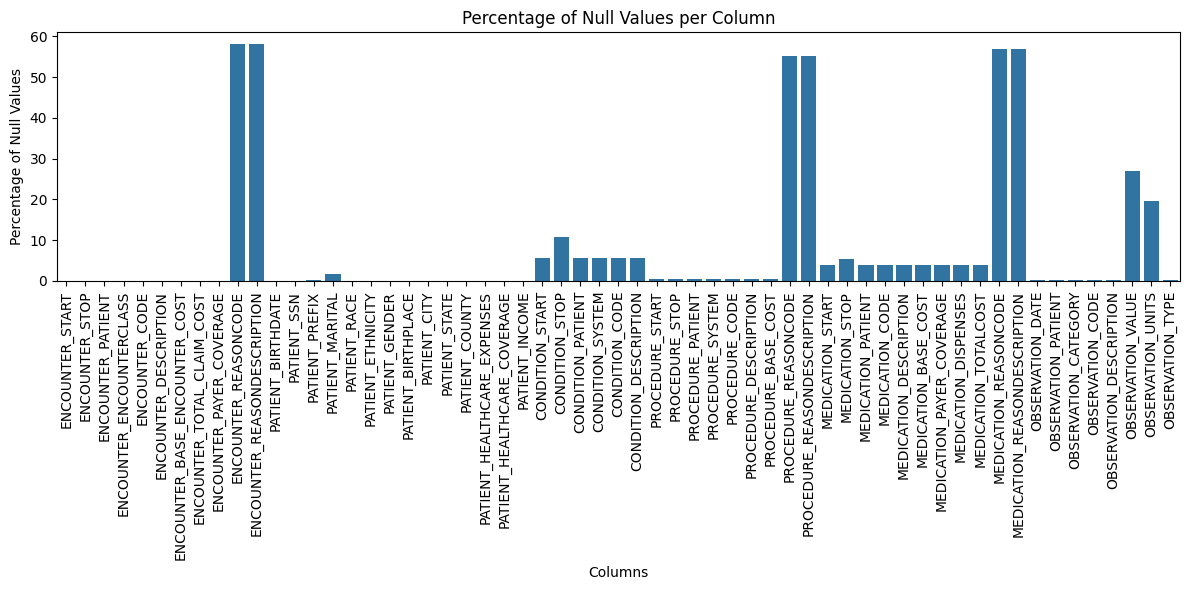

In [21]:
null_percentages = df.isnull().sum() / len(df) * 100

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentages.index, y=null_percentages.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values per Column")
plt.tight_layout()
plt.show()


In [22]:
# LOS
df['LENGTH_OF_STAY'] = (df['ENCOUNTER_STOP'] - df['ENCOUNTER_START']).dt.days

# fill missing cost values with median
cost_cols = ['ENCOUNTER_BASE_ENCOUNTER_COST', 'ENCOUNTER_TOTAL_CLAIM_COST']
df[cost_cols] = df[cost_cols].fillna(df[cost_cols].median())

# fill encounter missing values with mode
df['ENCOUNTER_ENCOUNTERCLASS'].fillna(df['ENCOUNTER_ENCOUNTERCLASS'].mode()[0], inplace=True)


<ipython-input-22-da61318f01ae>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ENCOUNTER_ENCOUNTERCLASS'].fillna(df['ENCOUNTER_ENCOUNTERCLASS'].mode()[0], inplace=True)


In [23]:
# fill demographic missing values with "UNKNOWN"
demo_cols = ['PATIENT_GENDER', 'PATIENT_RACE', 'PATIENT_ETHNICITY']
for col in demo_cols:
    # add 'UNKNOWN' as a new category
    if 'UNKNOWN' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories(['UNKNOWN'])
    df[col] = df[col].fillna('UNKNOWN')

In [24]:
# fill missing condition codes and descriptions with "UNKNOWN"

if 'UNKNOWN' not in df['CONDITION_DESCRIPTION'].cat.categories:
    df['CONDITION_DESCRIPTION'] = df['CONDITION_DESCRIPTION'].cat.add_categories(['UNKNOWN'])
df['CONDITION_DESCRIPTION'].fillna('UNKNOWN', inplace=True)
df['CONDITION_CODE'].fillna(-1, inplace=True)

<ipython-input-24-58be6f5a4519>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CONDITION_DESCRIPTION'].fillna('UNKNOWN', inplace=True)
<ipython-input-24-58be6f5a4519>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [25]:
# fill missing medication and procedure details
df['MEDICATION_CODE'].fillna(-1, inplace=True)
df['PROCEDURE_CODE'].fillna(-1, inplace=True)
df['OBSERVATION_VALUE'].fillna(df['OBSERVATION_VALUE'].median(), inplace=True)

if 'UNKNOWN' not in df['OBSERVATION_CATEGORY'].cat.categories:
    df['OBSERVATION_CATEGORY'] = df['OBSERVATION_CATEGORY'].cat.add_categories(['UNKNOWN'])

df['OBSERVATION_CATEGORY'].fillna('UNKNOWN', inplace=True)

<ipython-input-25-b8f8d6213b12>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MEDICATION_CODE'].fillna(-1, inplace=True)
<ipython-input-25-b8f8d6213b12>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [26]:
drop_cols = ['OBSERVATION_TYPE', 'OBSERVATION_UNITS', 'OBSERVATION_CODE',
             'PATIENT_PREFIX', 'PATIENT_BIRTHPLACE']
df.drop(columns=drop_cols, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 55 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    int64              
 13  PATIENT_MARITAL                category   

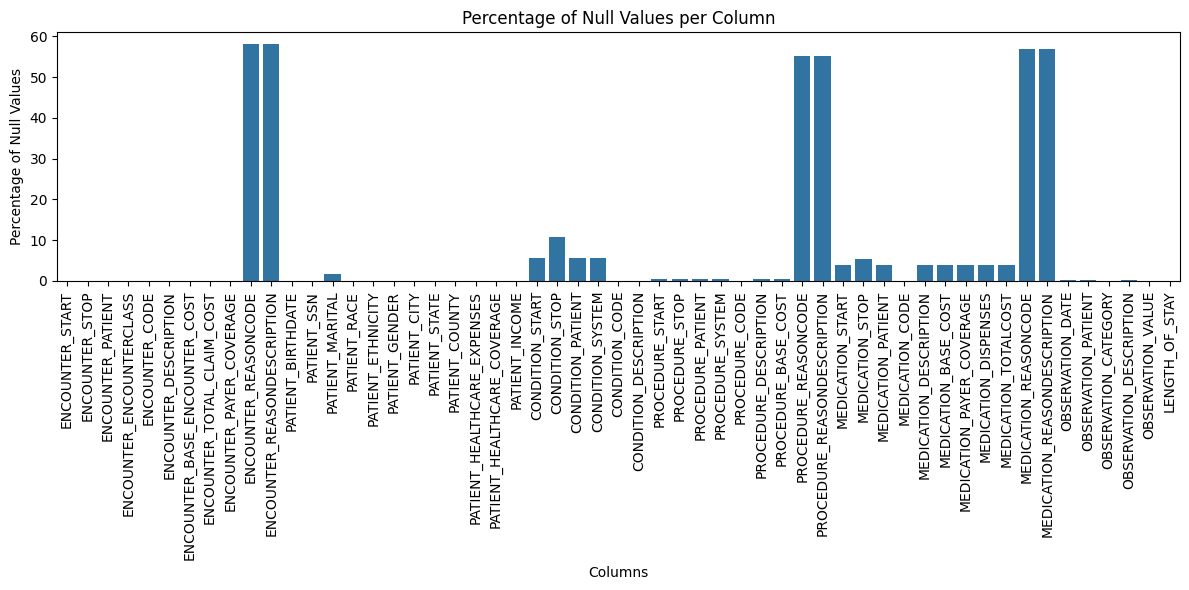

In [28]:
null_percentages = df.isnull().sum() / len(df) * 100

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentages.index, y=null_percentages.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values per Column")
plt.tight_layout()
plt.show()

# Df Creation for Modeling Encounter Reason

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 55 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    int64              
 13  PATIENT_MARITAL                category   

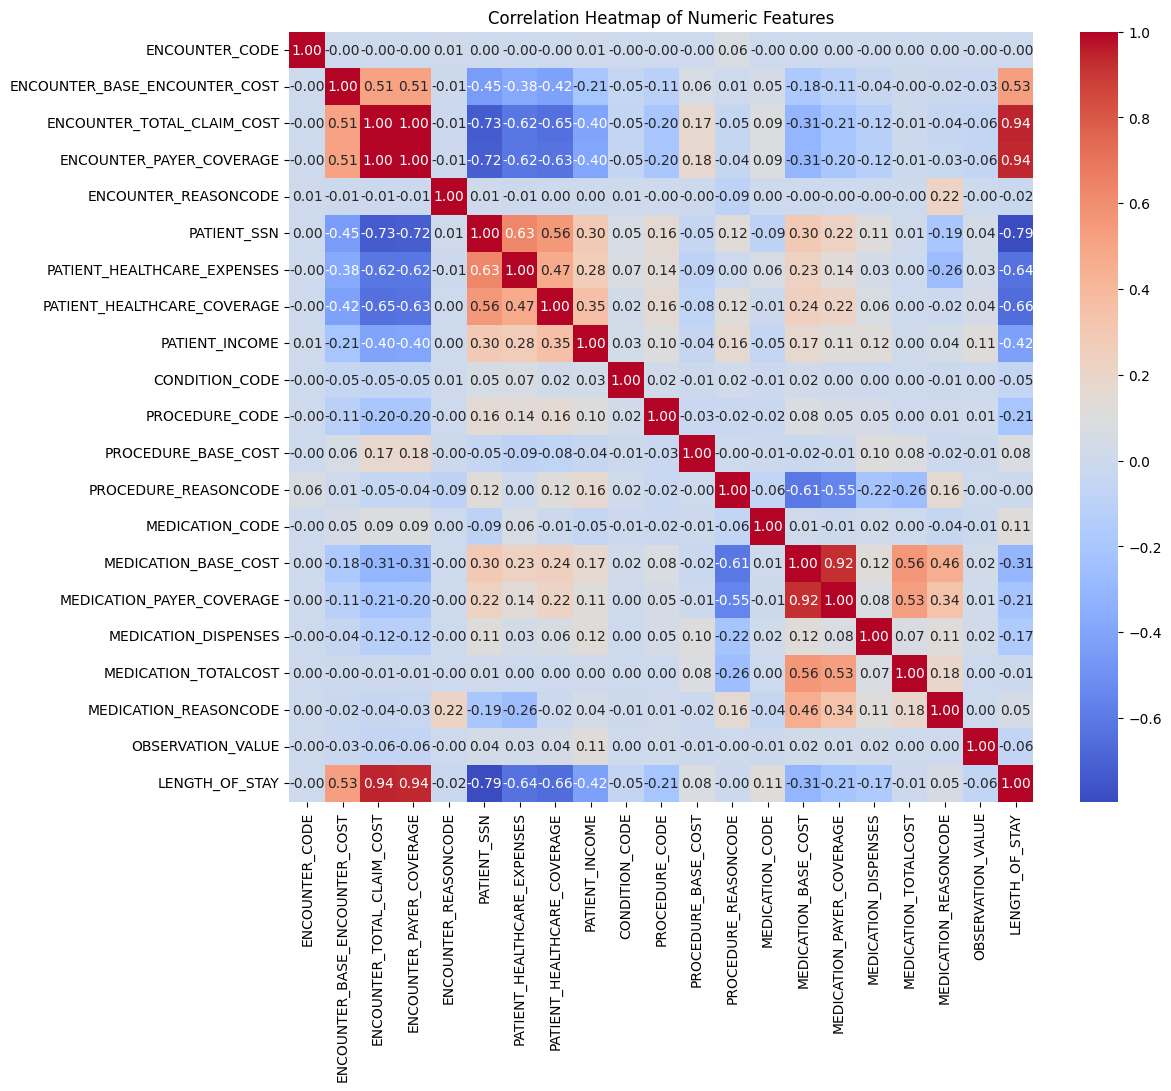

In [30]:

df_numeric = df.select_dtypes(include=np.number)

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [31]:
df_numeric = df.select_dtypes(include=np.number)

correlation_matrix = df_numeric.corr()

correlation_matrix

,ENCOUNTER_CODE,ENCOUNTER_BASE_ENCOUNTER_COST,ENCOUNTER_TOTAL_CLAIM_COST,ENCOUNTER_PAYER_COVERAGE,ENCOUNTER_REASONCODE,PATIENT_SSN,PATIENT_HEALTHCARE_EXPENSES,PATIENT_HEALTHCARE_COVERAGE,PATIENT_INCOME,CONDITION_CODE,...,PROCEDURE_BASE_COST,PROCEDURE_REASONCODE,MEDICATION_CODE,MEDICATION_BASE_COST,MEDICATION_PAYER_COVERAGE,MEDICATION_DISPENSES,MEDICATION_TOTALCOST,MEDICATION_REASONCODE,OBSERVATION_VALUE,LENGTH_OF_STAY
ENCOUNTER_CODE,1.000000e+00,-0.000461,-0.001422,-0.001349,0.009514,0.001643,-0.001832,-0.001586,0.005454,-0.000117,...,-0.000389,0.064260,-0.001788,0.000814,0.000955,-0.000234,2.162367e-08,0.001636,-0.000118,-0.001674
ENCOUNTER_BASE_ENCOUNTER_COST,-4.609640e-04,1.000000,0.510989,0.509963,-0.008713,-0.448080,-0.375709,-0.423016,-0.210785,-0.046146,...,0.057701,0.009419,0.046025,-0.180165,-0.110391,-0.042444,-2.839012e-03,-0.020677,-0.026119,0.525014
ENCOUNTER_TOTAL_CLAIM_COST,-1.422312e-03,0.510989,1.000000,0.998756,-0.013114,-0.729444,-0.617574,-0.647591,-0.403849,-0.052304,...,0.172320,-0.045800,0.090092,-0.307504,-0.211196,-0.122032,-6.033836e-03,-0.042506,-0.056160,0.943925
ENCOUNTER_PAYER_COVERAGE,-1.349352e-03,0.509963,0.998756,1.000000,-0.012480,-0.722482,-0.616029,-0.633167,-0.401123,-0.053405,...,0.175475,-0.041681,0.089163,-0.305640,-0.201712,-0.124268,-5.819565e-03,-0.033825,-0.055929,0.938005
ENCOUNTER_REASONCODE,9.513866e-03,-0.008713,-0.013114,-0.012480,1.000000,0.006646,-0.007652,0.003342,0.001938,0.005849,...,-0.002687,-0.086841,0.000703,-0.000053,-0.000037,-0.000052,-5.894653e-06,0.218532,-0.000373,-0.021075
PATIENT_SSN,1.642554e-03,-0.448080,-0.729444,-0.722482,0.006646,1.000000,0.633547,0.555564,0.295064,0.053895,...,-0.049402,0.118800,-0.087225,0.297420,0.221995,0.110406,6.556602e-03,-0.192588,0.037483,-0.794900
PATIENT_HEALTHCARE_EXPENSES,-1.832324e-03,-0.375709,-0.617574,-0.616029,-0.007652,0.633547,1.000000,0.472675,0.277241,0.069648,...,-0.091011,0.003425,0.057537,0.227871,0.135645,0.032739,2.744487e-03,-0.264667,0.028531,-0.636971
PATIENT_HEALTHCARE_COVERAGE,-1.585940e-03,-0.423016,-0.647591,-0.633167,0.003342,0.555564,0.472675,1.000000,0.353222,0.021307,...,-0.077401,0.116094,-0.005526,0.242794,0.218037,0.061810,3.260938e-03,-0.016576,0.044355,-0.658996
PATIENT_INCOME,5.454402e-03,-0.210785,-0.403849,-0.401123,0.001938,0.295064,0.277241,0.353222,1.000000,0.029263,...,-0.039503,0.159724,-0.047072,0.165658,0.112631,0.120505,4.942748e-03,0.037605,0.114094,-0.424870
CONDITION_CODE,-1.171206e-04,-0.046146,-0.052304,-0.053405,0.005849,0.053895,0.069648,0.021307,0.029263,1.000000,...,-0.009347,0.016837,-0.012395,0.018597,0.004964,0.002378,2.307560e-04,-0.008390,0.003524,-0.053850


<ipython-input-32-b8c8f66e2533>:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-32-b8c8f66e2533>:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-32-b8c8f66e2533>:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-32-b8c8f66e2533>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_scores.values, y=sorted_scores.index, palette="coolwarm")


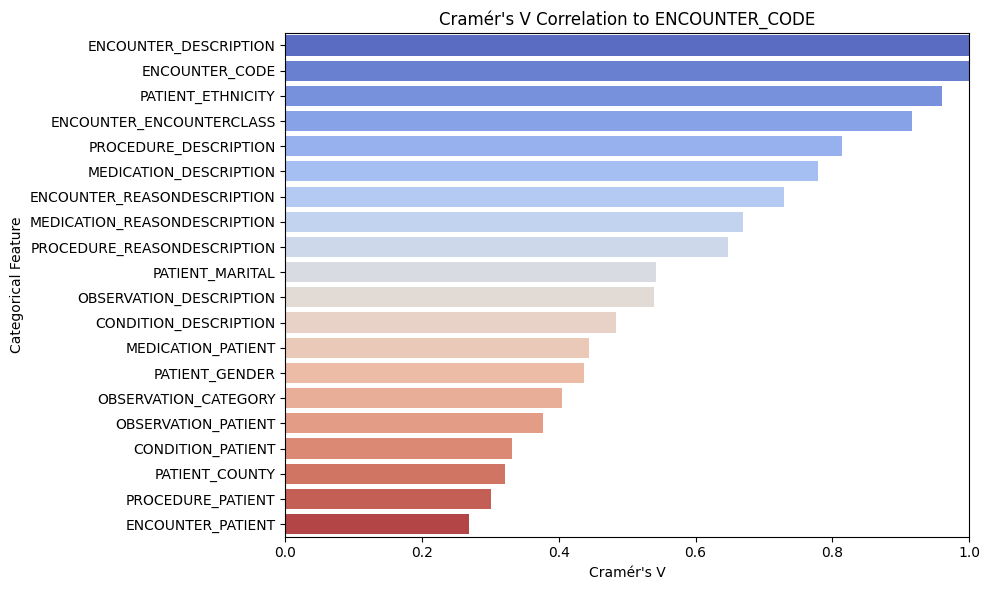

,0
ENCOUNTER_DESCRIPTION,1.000000
ENCOUNTER_CODE,1.000000
PATIENT_ETHNICITY,0.961126
ENCOUNTER_ENCOUNTERCLASS,0.916026
PROCEDURE_DESCRIPTION,0.814610
MEDICATION_DESCRIPTION,0.778553
ENCOUNTER_REASONDESCRIPTION,0.729518
MEDICATION_REASONDESCRIPTION,0.669605
PROCEDURE_REASONDESCRIPTION,0.647514
PATIENT_MARITAL,0.541819


In [32]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def cramers_v_vs_target(df, target_col, top_k=20):
    cat_cols = df.select_dtypes(include='category').columns
    scores = {}

    for col in cat_cols:
        try:
            score = cramers_v(df[col], df[target_col])
            scores[col] = score
        except:
            scores[col] = np.nan

    sorted_scores = pd.Series(scores).sort_values(ascending=False).head(top_k)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_scores.values, y=sorted_scores.index, palette="coolwarm")
    plt.title(f"Cramér's V Correlation to {target_col}")
    plt.xlabel("Cramér's V")
    plt.ylabel("Categorical Feature")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

    return sorted_scores

df['ENCOUNTER_CODE'] = df['ENCOUNTER_CODE'].astype('category')

cramers_v_vs_target(df, 'ENCOUNTER_CODE', top_k=20)



### Target: ENCOUNTER_CODE
### Features: ENCOUNTER_ENCOUNTERCLASS, ENCOUNTER_REASONDESCRIPTION,PROCEDURE_DESCRIPTION, MEDICATION_DESCRIPTION, MEDICATION_REASONDESCRIPTION, PATIENT_ETHNICITY, PATIENT_MARITAL, PATIENT_GENDER, PROCEDURE_REASONCODE, PATIENT_INCOME,ENCOUNTER_REASONCODE

In [33]:
selected_columns = [
    'ENCOUNTER_ENCOUNTERCLASS', 'ENCOUNTER_REASONDESCRIPTION',
    'PROCEDURE_DESCRIPTION', 'MEDICATION_DESCRIPTION', 'MEDICATION_REASONDESCRIPTION',
    'PATIENT_ETHNICITY', 'PATIENT_MARITAL', 'PATIENT_GENDER','PROCEDURE_REASONCODE',
    'PATIENT_INCOME', 'ENCOUNTER_REASONCODE', 'ENCOUNTER_CODE'
]

df_encounter = df[selected_columns]

print(df_encounter.shape)
df_encounter.head()


(3887768, 12)


,ENCOUNTER_ENCOUNTERCLASS,ENCOUNTER_REASONDESCRIPTION,PROCEDURE_DESCRIPTION,MEDICATION_DESCRIPTION,MEDICATION_REASONDESCRIPTION,PATIENT_ETHNICITY,PATIENT_MARITAL,PATIENT_GENDER,PROCEDURE_REASONCODE,PATIENT_INCOME,ENCOUNTER_REASONCODE,ENCOUNTER_CODE
0,wellness,NaN,NaN,NaN,NaN,nonhispanic,M,M,NaN,100511,NaN,162673000
1,wellness,NaN,NaN,NaN,NaN,nonhispanic,M,M,NaN,100511,NaN,162673000
2,wellness,NaN,NaN,NaN,NaN,nonhispanic,M,M,NaN,100511,NaN,162673000
3,wellness,NaN,NaN,NaN,NaN,nonhispanic,M,M,NaN,100511,NaN,162673000
4,wellness,NaN,NaN,NaN,NaN,nonhispanic,M,M,NaN,100511,NaN,162673000


In [34]:
df_encounter['ENCOUNTER_CODE'].nunique()

45

In [35]:
print(df_encounter['ENCOUNTER_CODE'].unique())

[162673000, 50849002, 185349003, 185345009, 185347001, ..., 453131000124105, 308251003, 386395000, 185316007, 185389009]
Length: 45
Categories (45, int64): [1505002, 32485007, 33879002, 50849002, ..., 439740005, 698314001, 702927004,
                         453131000124105]


In [36]:
df_encounter.tail()

,ENCOUNTER_ENCOUNTERCLASS,ENCOUNTER_REASONDESCRIPTION,PROCEDURE_DESCRIPTION,MEDICATION_DESCRIPTION,MEDICATION_REASONDESCRIPTION,PATIENT_ETHNICITY,PATIENT_MARITAL,PATIENT_GENDER,PROCEDURE_REASONCODE,PATIENT_INCOME,ENCOUNTER_REASONCODE,ENCOUNTER_CODE
3887763,ambulatory,Gingivitis (disorder),Dental application of desensitizing medicament...,NaN,NaN,nonhispanic,S,F,427898007.0,92537,66383009.0,185349003
3887764,ambulatory,Gingivitis (disorder),Simple extraction of tooth (procedure),NaN,NaN,nonhispanic,S,F,427898007.0,92537,66383009.0,185349003
3887765,ambulatory,Gingivitis (disorder),Postoperative care for dental procedure (regim...,NaN,NaN,nonhispanic,S,F,NaN,92537,66383009.0,185349003
3887766,ambulatory,Gingivitis (disorder),Examination of gingivae (procedure),NaN,NaN,nonhispanic,S,F,66383009.0,92537,66383009.0,185349003
3887767,ambulatory,Gingivitis (disorder),Oral health education (procedure),NaN,NaN,nonhispanic,S,F,66383009.0,92537,66383009.0,185349003


In [37]:
df_encounter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 12 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   ENCOUNTER_ENCOUNTERCLASS      category
 1   ENCOUNTER_REASONDESCRIPTION   category
 2   PROCEDURE_DESCRIPTION         category
 3   MEDICATION_DESCRIPTION        category
 4   MEDICATION_REASONDESCRIPTION  category
 5   PATIENT_ETHNICITY             category
 6   PATIENT_MARITAL               category
 7   PATIENT_GENDER                category
 8   PROCEDURE_REASONCODE          float64 
 9   PATIENT_INCOME                int64   
 10  ENCOUNTER_REASONCODE          float64 
 11  ENCOUNTER_CODE                category
dtypes: category(9), float64(2), int64(1)
memory usage: 126.1 MB


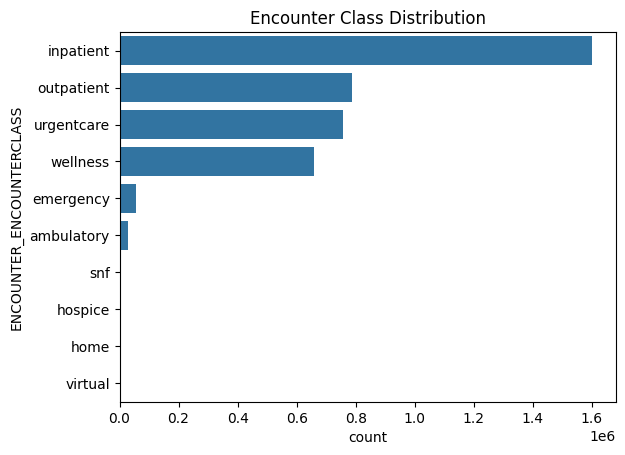

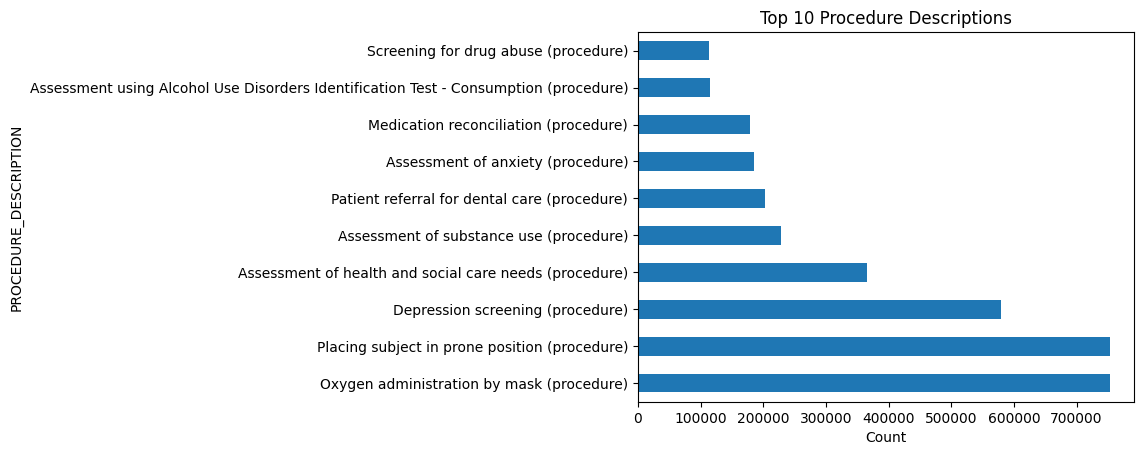

In [38]:
# Encounter class distribution
sns.countplot(y='ENCOUNTER_ENCOUNTERCLASS', data=df_encounter, order=df_encounter['ENCOUNTER_ENCOUNTERCLASS'].value_counts().index)
plt.title('Encounter Class Distribution')
plt.show()

# Top 10 procedure descriptions
df_encounter['PROCEDURE_DESCRIPTION'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Procedure Descriptions')
plt.xlabel('Count')
plt.show()


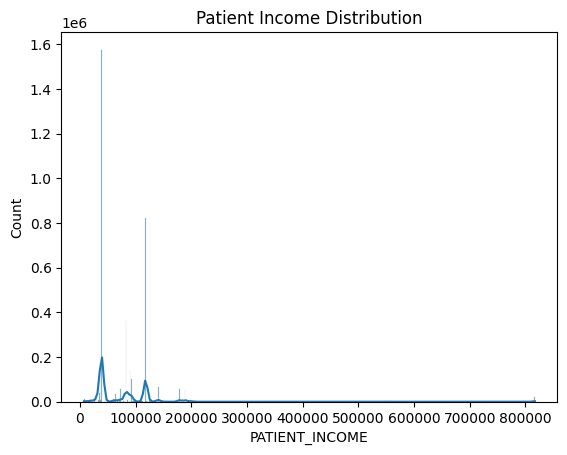

In [39]:
# Distribution of Patient Income
sns.histplot(df_encounter['PATIENT_INCOME'], kde=True)
plt.title('Patient Income Distribution')
plt.show()


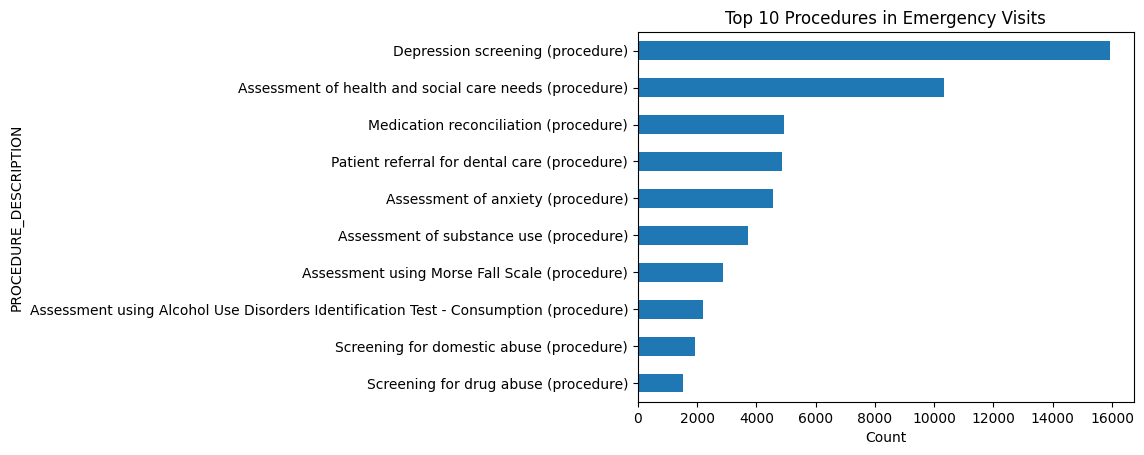

In [40]:
# Most common procedurer in ER visits
emergency_df = df[df['ENCOUNTER_ENCOUNTERCLASS'] == 'emergency']

top_procedures = emergency_df['PROCEDURE_DESCRIPTION'].value_counts().head(10)

top_procedures.plot(kind='barh')
plt.title('Top 10 Procedures in Emergency Visits')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()


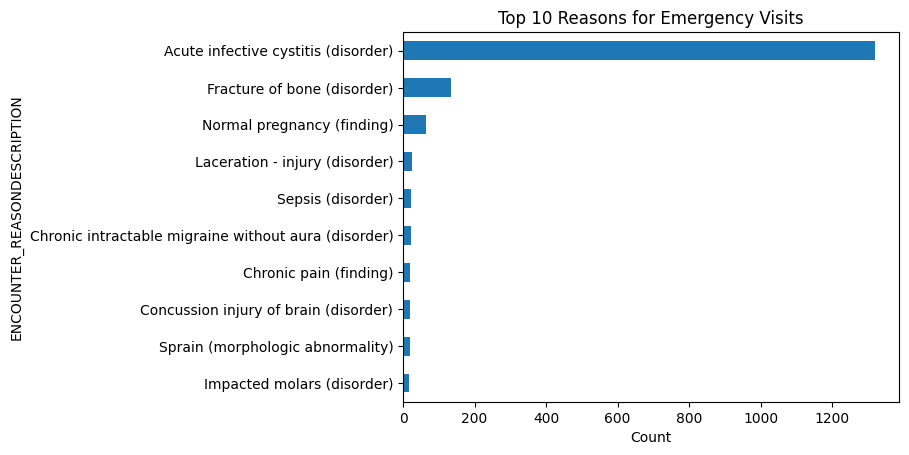

In [41]:
# Most common encounter reason in ER visits
top_reasons = emergency_df['ENCOUNTER_REASONDESCRIPTION'].value_counts().head(10)

top_reasons.plot(kind='barh')
plt.title('Top 10 Reasons for Emergency Visits')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()


# df_encounter Modeling

## Examining data more closely to prepare

In [68]:
selected_columns = [
    'ENCOUNTER_ENCOUNTERCLASS', 'ENCOUNTER_REASONDESCRIPTION',
    'PROCEDURE_DESCRIPTION', 'MEDICATION_DESCRIPTION', 'MEDICATION_REASONDESCRIPTION',
    'PATIENT_ETHNICITY', 'PATIENT_MARITAL', 'PATIENT_GENDER','PROCEDURE_REASONCODE',
    'PATIENT_INCOME', 'ENCOUNTER_REASONCODE', 'ENCOUNTER_CODE', 'ENCOUNTER_START', 'ENCOUNTER_STOP','LENGTH_OF_STAY',
    'PATIENT_SSN'
]

df_encounter = df[selected_columns]

print(df_encounter.shape)
df_encounter.head()

(3887768, 16)


,ENCOUNTER_ENCOUNTERCLASS,ENCOUNTER_REASONDESCRIPTION,PROCEDURE_DESCRIPTION,MEDICATION_DESCRIPTION,MEDICATION_REASONDESCRIPTION,PATIENT_ETHNICITY,PATIENT_MARITAL,PATIENT_GENDER,PROCEDURE_REASONCODE,PATIENT_INCOME,ENCOUNTER_REASONCODE,ENCOUNTER_CODE,ENCOUNTER_START,ENCOUNTER_STOP,LENGTH_OF_STAY,PATIENT_SSN
0,wellness,NaN,NaN,NaN,NaN,nonhispanic,M,M,NaN,100511,NaN,162673000,2012-04-01 09:04:48+00:00,2012-04-01 10:02:47+00:00,0,999528591
1,wellness,NaN,NaN,NaN,NaN,nonhispanic,M,M,NaN,100511,NaN,162673000,2012-04-01 09:04:48+00:00,2012-04-01 10:02:47+00:00,0,999528591
2,wellness,NaN,NaN,NaN,NaN,nonhispanic,M,M,NaN,100511,NaN,162673000,2012-04-01 09:04:48+00:00,2012-04-01 10:02:47+00:00,0,999528591
3,wellness,NaN,NaN,NaN,NaN,nonhispanic,M,M,NaN,100511,NaN,162673000,2012-04-01 09:04:48+00:00,2012-04-01 10:02:47+00:00,0,999528591
4,wellness,NaN,NaN,NaN,NaN,nonhispanic,M,M,NaN,100511,NaN,162673000,2012-04-01 09:04:48+00:00,2012-04-01 10:02:47+00:00,0,999528591


In [69]:
df_encounter.isnull().sum()

,0
ENCOUNTER_ENCOUNTERCLASS,0
ENCOUNTER_REASONDESCRIPTION,2258582
PROCEDURE_DESCRIPTION,21161
MEDICATION_DESCRIPTION,152358
MEDICATION_REASONDESCRIPTION,2215176
PATIENT_ETHNICITY,0
PATIENT_MARITAL,70899
PATIENT_GENDER,0
PROCEDURE_REASONCODE,2147635
PATIENT_INCOME,0


In [70]:
#removing null rows
df_nonulls = df_encounter.dropna(axis=1, how='any')


In [71]:
df_nonulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 9 columns):
 #   Column                    Dtype              
---  ------                    -----              
 0   ENCOUNTER_ENCOUNTERCLASS  category           
 1   PATIENT_ETHNICITY         category           
 2   PATIENT_GENDER            category           
 3   PATIENT_INCOME            int64              
 4   ENCOUNTER_CODE            category           
 5   ENCOUNTER_START           datetime64[ns, UTC]
 6   ENCOUNTER_STOP            datetime64[ns, UTC]
 7   LENGTH_OF_STAY            int64              
 8   PATIENT_SSN               int64              
dtypes: category(4), datetime64[ns, UTC](2), int64(3)
memory usage: 163.1 MB


In [72]:
df_nonulls.isnull().sum()

,0
ENCOUNTER_ENCOUNTERCLASS,0
PATIENT_ETHNICITY,0
PATIENT_GENDER,0
PATIENT_INCOME,0
ENCOUNTER_CODE,0
ENCOUNTER_START,0
ENCOUNTER_STOP,0
LENGTH_OF_STAY,0
PATIENT_SSN,0


In [73]:
df_nonulls['PATIENT_SSN'].nunique()

106

In [74]:
df['ENCOUNTER_CODE'].value_counts()

,count
ENCOUNTER_CODE,
1505002,1561476
185349003,792502
702927004,757151
162673000,645921
50849002,55183
305432006,26690
185347001,13875
410620009,12355
397821002,12160


## Splitting data into sets

In [75]:
all_patients = df_nonulls['PATIENT_SSN'].unique()
np.random.seed(101)
np.random.shuffle(all_patients)

train_ids = all_patients[:80]
val_ids = all_patients[80:86]
test_ids = all_patients[86:]


In [76]:
train_df = df_nonulls[df_nonulls['PATIENT_SSN'].isin(train_ids)]
val_df = df_nonulls[df_nonulls['PATIENT_SSN'].isin(val_ids)]
test_df = df_nonulls[df_nonulls['PATIENT_SSN'].isin(test_ids)]


In [77]:
train_df = train_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
val_df = val_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
test_df = test_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])


In [78]:
train_df.head()

,ENCOUNTER_ENCOUNTERCLASS,PATIENT_ETHNICITY,PATIENT_GENDER,PATIENT_INCOME,ENCOUNTER_CODE,ENCOUNTER_START,ENCOUNTER_STOP,LENGTH_OF_STAY,PATIENT_SSN
3435893,wellness,nonhispanic,F,62332,162673000,1980-08-25 05:02:16+00:00,1980-08-25 05:34:27+00:00,0,999104511
3435894,ambulatory,nonhispanic,F,62332,185347001,1988-09-05 05:02:16+00:00,1988-09-05 06:11:06+00:00,0,999104511
3435895,wellness,nonhispanic,F,62332,162673000,1990-09-10 05:02:16+00:00,1990-09-10 05:56:13+00:00,0,999104511
3435896,ambulatory,nonhispanic,F,62332,185345009,1997-07-12 13:02:16+00:00,1997-07-12 13:17:16+00:00,0,999104511
3435897,outpatient,nonhispanic,F,62332,185349003,1997-07-21 05:02:16+00:00,1997-07-21 05:34:55+00:00,0,999104511


In [79]:
# Adding the time aware features for the model

def add_time_features(df):
    df['DAYS_SINCE_LAST'] = df.groupby('PATIENT_SSN')['ENCOUNTER_START'].diff().dt.days
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].fillna(0)
    df['RECENCY_SCORE'] = 1 / (1 + df['DAYS_SINCE_LAST'])  # simple decay
    return df

train_df = add_time_features(train_df)
val_df = add_time_features(val_df)
test_df = add_time_features(test_df)


In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3723452 entries, 3435893 to 3435012
Data columns (total 11 columns):
 #   Column                    Dtype              
---  ------                    -----              
 0   ENCOUNTER_ENCOUNTERCLASS  category           
 1   PATIENT_ETHNICITY         category           
 2   PATIENT_GENDER            category           
 3   PATIENT_INCOME            int64              
 4   ENCOUNTER_CODE            category           
 5   ENCOUNTER_START           datetime64[ns, UTC]
 6   ENCOUNTER_STOP            datetime64[ns, UTC]
 7   LENGTH_OF_STAY            int64              
 8   PATIENT_SSN               int64              
 9   DAYS_SINCE_LAST           float64            
 10  RECENCY_SCORE             float64            
dtypes: category(4), datetime64[ns, UTC](2), float64(2), int64(3)
memory usage: 241.5 MB


In [81]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['ENCOUNTER_ENCOUNTERCLASS', 'PATIENT_ETHNICITY',
              'PATIENT_GENDER']

encoders = {}
for col in label_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    val_df[col] = le.transform(val_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))
    encoders[col] = le


In [82]:
from sklearn.preprocessing import StandardScaler

num_cols = ['PATIENT_INCOME', 'LENGTH_OF_STAY', 'RECENCY_SCORE']

scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
val_df[num_cols] = scaler.transform(val_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])


In [83]:
# Aligning the current row features with the next visit label

def shift_labels(df):
    df['NEXT_ENCOUNTER_CODE'] = df.groupby('PATIENT_SSN')['ENCOUNTER_CODE'].shift(-1)
    return df.dropna(subset=['NEXT_ENCOUNTER_CODE'])

train_df = shift_labels(train_df)
val_df = shift_labels(val_df)
test_df = shift_labels(test_df)


# Modeling

In [86]:
drop_cols = ['ENCOUNTER_CODE', 'NEXT_ENCOUNTER_CODE', 'PATIENT_SSN', 'ENCOUNTER_START', 'ENCOUNTER_STOP']
feature_cols = [col for col in train_df.columns if col not in drop_cols]


In [87]:
X_train = train_df[feature_cols]
y_train = train_df['NEXT_ENCOUNTER_CODE']

X_val = val_df[feature_cols]
y_val = val_df['NEXT_ENCOUNTER_CODE']


In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)


### Random Forest:
- Accuracy 68%
- Favoring high-freq encounter scores and ignoring rare ones

In [90]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_val)


ValueError: Number of classes, 18, does not match size of target_names, 45. Try specifying the labels parameter

In [92]:
from sklearn.metrics import classification_report

all_labels = np.arange(len(le.classes_))         # 0 to n-1 (label indices)
all_names = le.classes_.astype(str)              # convert int labels to strings

# Optional: suppress zero warnings
print(classification_report(
    y_val,
    rf_y_pred,
    labels=all_labels,
    target_names=all_names,
    zero_division=0  # avoid warnings for classes with no predictions
))


                 precision    recall  f1-score   support

        1505002       0.00      0.00      0.00         0
       32485007       0.00      0.00      0.00         0
       33879002       0.17      0.12      0.14         8
       50849002       0.40      0.27      0.32        15
       56876005       0.00      0.00      0.00         0
       79094001       0.00      0.00      0.00         0
       86013001       0.00      0.00      0.00         0
      162673000       0.67      1.00      0.81      4745
      169762003       0.02      0.67      0.03         6
      170837001       0.00      0.00      0.00         0
      182813001       0.00      0.00      0.00         0
      183452005       0.00      0.00      0.00         0
      183460006       0.60      0.50      0.55         6
      183478001       0.00      0.00      0.00         0
      183495009       0.00      0.00      0.00         0
      185316007       0.00      0.00      0.00         0
      185345009       0.06    

### Logistic Regression with class weights

In [94]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=101,
    n_jobs=-1
)

log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_val)

print(classification_report(
    y_val, log_preds,
    labels=np.arange(len(le.classes_)),
    target_names=le.classes_.astype(str),
    zero_division=0
))


KeyboardInterrupt: 

In [ ]:
# To decode preds
#decoded_preds = le.inverse_transform(y_pred)


## Prepping for deep learning models

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Group each patient’s full feature + label history
def build_sequences(df, feature_cols, target_col='NEXT_ENCOUNTER_CODE', max_len=10):
    X_seqs = []
    y_labels = []

    for _, group in df.groupby('PATIENT_SSN'):
        group = group.sort_values('ENCOUNTER_START')

        # Skip short patient histories
        #if len(group) < 2:
            #continue

        features = group[feature_cols].values
        targets = group[target_col].values

        for i in range(1, len(features)):
            X_seqs.append(features[:i])
            y_labels.append(targets[i])

    X_padded = pad_sequences(X_seqs, maxlen=max_len, dtype='float32', padding='pre')
    return np.array(X_padded), np.array(y_labels)


In [ ]:
train_df['NEXT_ENCOUNTER_CODE'] = le.inverse_transform(y_train)
val_df['NEXT_ENCOUNTER_CODE'] = le.inverse_transform(y_val)

max_seq_len = 10  # CAN EDIT
X_train_seq, y_train_seq = build_sequences(train_df, feature_cols, max_len=max_seq_len)
X_val_seq, y_val_seq = build_sequences(val_df, feature_cols, max_len=max_seq_len)

y_train_seq = le.transform(y_train_seq)
y_val_seq = le.transform(y_val_seq)


In [ ]:
print(X_train_seq.shape)
print(len(np.unique(y_train_seq)))

### LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
seq_len = X_train_seq.shape[1]
num_features = X_train_seq.shape[2]
num_classes = len(np.unique(y_train_seq))

lstm_model = Sequential()
lstm_model.add(Masking(mask_value=0.0, input_shape=(seq_len, num_features)))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(num_classes, activation='softmax'))


In [ ]:
lstm_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = lstm_model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


In [ ]:
lstm_val_loss, lstm_val_acc = lstm_model.evaluate(X_val_seq, y_val_seq)
print(f"Validation Accuracy: {lstm_val_acc:.2f}")

In [ ]:
# LSTM PREDS
lstm_y_pred_probs = lstm_model.predict(X_val_seq)
lstm_y_pred_classes = np.argmax(lstm_y_pred_probs, axis=1)


In [ ]:
# Decode if needed
#decoded_preds = le.inverse_transform(y_pred_classes)
#decoded_truth = le.inverse_transform(y_val_seq)

### GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Masking

# Reuse the same input shape
seq_len = X_train_seq.shape[1]
num_features = X_train_seq.shape[2]
num_classes = len(np.unique(y_train_seq))

# GRU model
gru_model = Sequential()
gru_model.add(Masking(mask_value=0.0, input_shape=(seq_len, num_features)))
gru_model.add(GRU(128, return_sequences=False))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(num_classes, activation='softmax'))

gru_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

gru_history = gru_model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=20,
    batch_size=64,
    verbose=1
)

### CNN

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

cnn_model = Sequential()
cnn_model.add(Masking(mask_value=0.0, input_shape=(seq_len, num_features)))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())  # compresses time dimension
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(num_classes, activation='softmax'))

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

cnn_history = cnn_model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=20,
    batch_size=64,
    verbose=1
)


In [ ]:
# Evaluate both models
# GRU evaluation
gru_val_loss, gru_val_acc = gru_model.evaluate(X_val_seq, y_val_seq)
print(f"GRU Validation Accuracy: {gru_val_acc:.2f}")

# CNN evaluation
cnn_val_loss, cnn_val_acc = cnn_model.evaluate(X_val_seq, y_val_seq)
print(f"CNN Validation Accuracy: {cnn_val_acc:.2f}")


In [ ]:
# Visualize training

def plot_history(hist, title):
    plt.plot(hist.history['accuracy'], label='Train Acc')
    plt.plot(hist.history['val_accuracy'], label='Val Acc')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(gru_history, "GRU Accuracy")
plot_history(cnn_history, "CNN Accuracy")


# Model Evaluation


- Pick best model
- Tune best model to get better scores
- Evaluate model
- Save model and upload to git for group use